# CS189 Homework 3

In [1]:
### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import io
from scipy import stats
import random

## Question 3: Isocontours of Normal Distributions

### Setup

In [3]:
# SpaceParameters is organized as a list with [Start point, End point, Step size]
def getXY(xSpaceParams, ySpaceParams):
    x, y = np.mgrid[xSpaceParams[0]:xSpaceParams[1]:xSpaceParams[2], ySpaceParams[0]:ySpaceParams[1]:ySpaceParams[2]]
    return x, y

def getZ(meanVec, covMatrix):
    return scipy.stats.multivariate_normal(mean = meanVec, cov = covMatrix)
    
def plotIsocontour(x, y, z, partNum):
    pos = np.dstack((x, y))
    fig, ax = plt.subplots()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Isocontour map for part {}".format(partNum))
    CS = ax.contour(x, y, z.pdf(pos))
    ax.contourf(x, y, z.pdf(pos))
    ax.clabel(CS, CS.levels, inline = True, colors = "black")
    
def plotDifferenceIsocontour(x, y, z1, z2, partNum):
    pos = np.dstack((x, y))
    fig, ax = plt.subplots()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Isocontour map for part {}".format(partNum))
    CS = ax.contour(x, y, z1.pdf(pos) - z2.pdf(pos))
    ax.contourf(x, y, z1.pdf(pos) - z2.pdf(pos))
    ax.clabel(CS, CS.levels, inline = True, colors = "black")

### Part 1

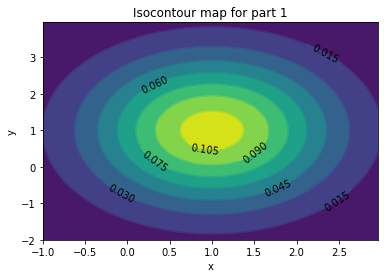

In [4]:
firstMeanVec = np.array([1, 1])
firstCovMatrix = np.array([[1, 0],
                         [0, 2]])
firstXSpaceParams = [-1, 3, 0.04]
firstYSpaceParams = [-2 , 4, 0.04]
firstX, firstY = getXY(firstXSpaceParams, firstYSpaceParams)
firstZ = getZ(firstMeanVec, firstCovMatrix)
plotIsocontour(firstX, firstY, firstZ, 1)

### Part 2

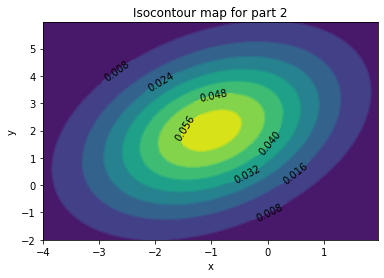

In [5]:
secondMeanVec = np.array([-1, 2])
secondCovMatrix = np.array([[2, 1],
                           [1, 4]])
secondXSpaceParams = [-4, 2, 0.04]
secondYSpaceParams = [-2, 6, 0.04]
secondX, secondY = getXY(secondXSpaceParams, secondYSpaceParams)
secondZ = getZ(secondMeanVec, secondCovMatrix)
plotIsocontour(secondX, secondY, secondZ, 2)

### Part 3

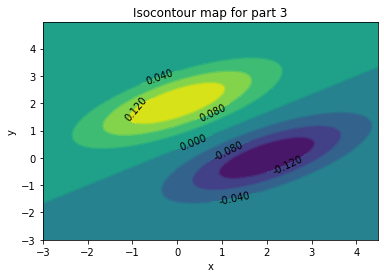

In [6]:
thirdMeanVec1 = np.array([0, 2])
thirdMeanVec2 = np.array([2, 0])
thirdCovMatrix = np.array([[2, 1],
                          [1, 1]])
thirdXSpaceParams = [-3, 4.52, 0.04]
thirdYSpaceParams = [-3, 5, 0.04]
thirdX, thirdY = getXY(thirdXSpaceParams, thirdYSpaceParams)
thirdZ1 = getZ(thirdMeanVec1, thirdCovMatrix)
thirdZ2 = getZ(thirdMeanVec2, thirdCovMatrix)
plotDifferenceIsocontour(thirdX, thirdY, thirdZ1, thirdZ2, 3)

### Part 4

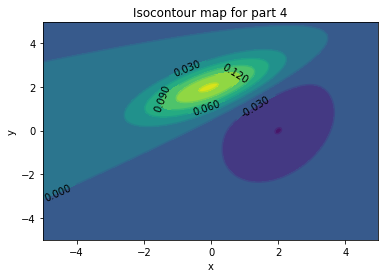

In [7]:
fourthMeanVec1 = np.array([0, 2])
fourthMeanVec2 = np.array([2, 0])
fourthCovMatrix1 = np.array([[2, 1],
                            [1, 1]])
fourthCovMatrix2 = np.array([[2, 1],
                            [1, 4]])
fourthXSpaceParams = [-5, 5, 0.04]
fourthYSpaceParams = [-5, 5, 0.04]
fourthX, fourthY = getXY(fourthXSpaceParams, fourthYSpaceParams)
fourthZ1 = getZ(fourthMeanVec1, fourthCovMatrix1)
fourthZ2 = getZ(fourthMeanVec2, fourthCovMatrix2)
plotDifferenceIsocontour(fourthX, fourthY, fourthZ1, fourthZ2, 4)

### Part 5

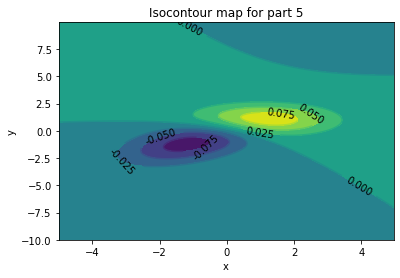

In [8]:
fifthMeanVec1 = np.array([1, 1])
fifthMeanVec2 = np.array([-1, -1])
fifthCovMatrix1 = np.array([[2, 0],
                           [0, 1]])
fifthCovMatrix2 = np.array([[2, 1],
                           [1, 2]])
fifthXSpaceParams = [-5, 5, 0.04]
fifthYSpaceParams = [-10, 10, 0.04]
fifthX, fifthY = getXY(fifthXSpaceParams, fifthYSpaceParams)
fifthZ1 = getZ(fifthMeanVec1, fifthCovMatrix1)
fifthZ2 = getZ(fifthMeanVec2, fifthCovMatrix2)
plotDifferenceIsocontour(fifthX, fifthY, fifthZ1, fifthZ2, 5)

## Question 4: Eigenvectors of the Gaussian Covariance Matrix

### Setup

In [9]:
random.seed(0)
X1Samples = []
X2Samples = []
for __ in range(100):
    x1 = np.random.normal(loc = 3, scale = 3)
    x2 = (x1 / 2) + np.random.normal(loc = 4, scale = 2)
    X1Samples.append(x1)
    X2Samples.append(x2)

### Part 1

In [10]:
meanVec = np.array([sum(X1Samples) / 100, sum(X2Samples) / 100])
print("Mean Vector:")
print(meanVec)

Mean Vector:
[3.01918218 5.45015613]


### Part 2

In [11]:
covMatrix = np.cov(np.stack((X1Samples, X2Samples), axis = 0))
print("Covariance matrix:")
print(covMatrix)

Covariance matrix:
[[6.57231704 3.30376514]
 [3.30376514 4.76738632]]


### Part 3

In [12]:
result = np.linalg.eig(covMatrix)
eigenvalues = result[0]
eigenvectors = result[1]
print("Eigenvalue vector:")
print(eigenvalues)
print("Matrix of eigenvectors(in same order as the corresponding eigenvalues)")
print(eigenvectors)

Eigenvalue vector:
[9.09465939 2.24504397]
Matrix of eigenvectors(in same order as the corresponding eigenvalues)
[[ 0.79482965 -0.60683262]
 [ 0.60683262  0.79482965]]


### Part 4

The red vector is the scaled eigenvector of X1 and the green vector is the scaled eigenvector of X2


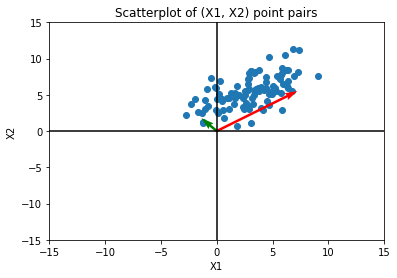

In [13]:
fig, ax = plt.subplots()
plt.scatter(X1Samples, X2Samples)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.axvline(x=0, c = "black", label="x=0")
plt.axhline(y=0, c = "black", label="y=0")

origin = np.array([[0],
                   [0]])
plt.quiver(*origin, eigenvectors[0][0], eigenvectors[1][0], color=['r'],\
           angles = "xy", scale_units = "xy", scale = 1 / eigenvalues[0])
plt.quiver(*origin, eigenvectors[0][1], eigenvectors[1][1], color=['g'],\
           angles = "xy", scale_units = "xy", scale = 1 / eigenvalues[1])
print("The red vector is the scaled eigenvector of X1 and the green vector is the scaled eigenvector of X2")

plt.title("Scatterplot of (X1, X2) point pairs")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

### Part 5

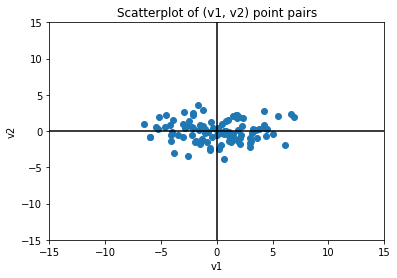

In [14]:
# Centering
centeredX1Samples = [point - meanVec[0] for point in X1Samples]
centeredX2Samples = [point - meanVec[1] for point in X2Samples]

# Rotating
UTranspose = eigenvectors.T
rotatedPoints = UTranspose.dot(np.vstack((centeredX1Samples, centeredX2Samples)))

plt.scatter(rotatedPoints[0], rotatedPoints[1])
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.axvline(x=0, c = "black", label="x=0")
plt.axhline(y=0, c = "black", label="y=0")
plt.title("Scatterplot of (v1, v2) point pairs")
plt.xlabel("v1")
plt.ylabel("v2")
plt.show()

## Question 8: Gaussian Digits for Classifiers and Spam

### Setup

In [15]:
mnistData = io.loadmat("data/mnist_data.mat")
spamData = io.loadmat("data/spam_data.mat")

# Contrast normalization(by dividing pixel values by its L2-norm)
def contrastNormalization(dataset):
    datasetCopy = np.empty(dataset.shape)
    for imageIndex in range(dataset.shape[0]):
        image = dataset[imageIndex]
        L2Norm = np.linalg.norm(image)
        if L2Norm == 0:
            datasetCopy[imageIndex] = image
            continue
        datasetCopy[imageIndex] = image / L2Norm
    return datasetCopy

### Part 1

In [16]:
# Contrast normalization of training data
mnistData["training_data"] = contrastNormalization(mnistData["training_data"])

# Fitting to Gaussian distribution
sampleMeans = []
sampleCovs = []
for digit in range(10): # Using range(10) since are classifying digits from 0-9
    matchingSamples = np.where(mnistData["training_labels"] == digit)[0]
    sampleMean = np.mean(mnistData["training_data"][matchingSamples], axis = 0)
    sampleCov = np.cov(mnistData["training_data"][matchingSamples].T)
    
    sampleMeans.append(sampleMean)
    sampleCovs.append(sampleCov)
print(len(sampleMeans[0])) # Should be 784
print(sampleCovs[0].shape) # Should be 784x784

784
(784, 784)


### Part 2

Visualizing covariance matrix for class 6
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


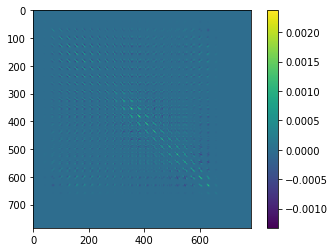

In [17]:
covDigit = random.randint(0, 9)
print("Visualizing covariance matrix for class {}".format(covDigit))

plt.imshow(sampleCovs[covDigit])
plt.colorbar()
print(sampleCovs[covDigit])

The entries along the diagonal of the covariance matrix are larger than the other off-diagonal entries. This means that the variance of each pixel is larger than its covariance with any other pixel(for images of the same class). This follows intuitively, as an pixel's variance, or its covariance with itself, is likely to be higher than its covariance with another pixel, which has different aspects such as position.

### Part 3

In [18]:
# Setup
from sklearn.metrics import accuracy_score
import pandas as pd

# Separates training data into validation data(length of size) and 
# training data(length of (len - size))
def createValidationSet(data, size):
    trainingData = data["training_data"]
    trainingLabels = data["training_labels"]

    indices = np.arange(trainingData.shape[0])
    np.random.shuffle(indices)
    shuffledData = trainingData[indices]
    shuffledLabels = trainingLabels[indices]

    dataset = dict()
    dataset["validation_data"] = shuffledData[:size]
    dataset["validation_labels"] = shuffledLabels[:size]
    dataset["training_data"] = shuffledData[size + 1:]
    dataset["training_labels"] = shuffledLabels[size + 1:]
    return dataset

# Trains using Linear Discriminant Analysis for MNIST Dataset and returns the training and validation accuracies
def MNISTLDA(dataset, size):
    validationData = dataset["validation_data"]
    validationLabels = dataset["validation_labels"]
    trainingData = dataset["training_data"][:size]
    trainingLabels = dataset["training_labels"][:size]
    
    priors = [] # Arranged in order of digit number(0-9)
    means = [] # Arranged in order of digit number(0-9)
    cov = np.zeros((trainingData.shape[1], trainingData.shape[1]), dtype=np.float64) # Should be #pixels by #pixels
    for digit in range(10): # Using range(10) since are classifying digits from 0-9
        matchingSamples = np.where(trainingLabels == digit)[0]
        prior = len(matchingSamples) / trainingData.shape[0]
        priors.append(prior)
        
        means.append(np.mean(trainingData[matchingSamples], axis = 0))
        
        cov += np.cov(trainingData[matchingSamples].T) / 10
        
    gaussians = [scipy.stats.multivariate_normal(means[digit], cov, allow_singular=True) \
                for digit in range(10)]
    
    trainingPosteriors = np.array([gaussian.logpdf(trainingData) for gaussian in gaussians]).T + np.log(priors)
    validationPosteriors = np.array([gaussian.logpdf(validationData) for gaussian in gaussians]).T + np.log(priors)

    trainingPredictions = np.argmax(trainingPosteriors, axis = 1)
    validationPredictions = np.argmax(validationPosteriors, axis = 1)
    return trainingPredictions, validationPredictions

# Trains using Quadratic Discriminant Analysis for MNIST Dataset and returns the training and validation accuracies
def MNISTQDA(dataset, size):
    validationData = dataset["validation_data"]
    validationLabels = dataset["validation_labels"]
    trainingData = dataset["training_data"][:size]
    trainingLabels = dataset["training_labels"][:size]
    
    priors = [] # Arranged in order of digit number(0-9)
    gaussians = [] # Arranged in order of digit number(0-9)
    for digit in range(10): # Using range(10) since are classifying digits from 0-9
        matchingSamples = np.where(trainingLabels == digit)[0]
        prior = len(matchingSamples) / trainingData.shape[0]
        priors.append(prior)
        
        mean = np.mean(trainingData[matchingSamples], axis = 0)
        
        cov = np.cov(trainingData[matchingSamples].T)
        
        gaussian = scipy.stats.multivariate_normal(mean, cov, allow_singular=True)
        gaussians.append(gaussian)
    
    trainingPosteriors = np.array([gaussian.logpdf(trainingData) for gaussian in gaussians]).T + np.log(priors)
    validationPosteriors = np.array([gaussian.logpdf(validationData) for gaussian in gaussians]).T + np.log(priors)

    trainingPredictions = np.argmax(trainingPosteriors, axis = 1)
    validationPredictions = np.argmax(validationPosteriors, axis = 1)
    return trainingPredictions, validationPredictions

def results_to_csv(y_test, path):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv(path, index_label='Id')

Training 100 samples of MNIST Data using LDA. Got training accuracy 0.98 and validation accuracy 0.6494.
Training 200 samples of MNIST Data using LDA. Got training accuracy 0.995 and validation accuracy 0.7332.
Training 500 samples of MNIST Data using LDA. Got training accuracy 1.0 and validation accuracy 0.3981.
Training 1000 samples of MNIST Data using LDA. Got training accuracy 0.997 and validation accuracy 0.6903.
Training 2000 samples of MNIST Data using LDA. Got training accuracy 0.972 and validation accuracy 0.7977.
Training 5000 samples of MNIST Data using LDA. Got training accuracy 0.9266 and validation accuracy 0.8518.
Training 10000 samples of MNIST Data using LDA. Got training accuracy 0.9015 and validation accuracy 0.8688.
Training 30000 samples of MNIST Data using LDA. Got training accuracy 0.8849666666666667 and validation accuracy 0.8773.
Training 50000 samples of MNIST Data using LDA. Got training accuracy 0.882577651553031 and validation accuracy 0.8788.


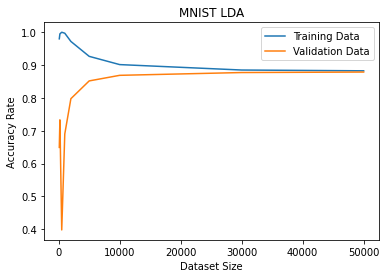

In [19]:
# Section (a)
newMNISTDataset = createValidationSet(mnistData, 10000)

sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
trainingAccuracies = []
validationAccuracies = []
for size in sizes:
    results = MNISTLDA(newMNISTDataset, size)
    trainingAccuracy = accuracy_score(newMNISTDataset["training_labels"][:size], results[0])
    validationAccuracy = accuracy_score(newMNISTDataset["validation_labels"], results[1])
    
    trainingAccuracies.append(trainingAccuracy)
    validationAccuracies.append(validationAccuracy)
    print("Training {} samples of MNIST Data using LDA. Got training accuracy {} and validation accuracy {}."\
          .format(size, trainingAccuracy, validationAccuracy))
    
# Plotting the results
plt.plot(sizes, trainingAccuracies, label="Training Data")
plt.plot(sizes, validationAccuracies, label="Validation Data")
plt.xlabel("Dataset Size")
plt.ylabel("Accuracy Rate")
plt.title("MNIST LDA")
plt.legend()
plt.show()

Training 100 samples of MNIST Data using QDA. Got training accuracy 0.14 and validation accuracy 0.0954.
Training 200 samples of MNIST Data using QDA. Got training accuracy 0.1 and validation accuracy 0.1858.
Training 500 samples of MNIST Data using QDA. Got training accuracy 0.356 and validation accuracy 0.3221.
Training 1000 samples of MNIST Data using QDA. Got training accuracy 0.775 and validation accuracy 0.6676.
Training 2000 samples of MNIST Data using QDA. Got training accuracy 0.9995 and validation accuracy 0.7681.
Training 5000 samples of MNIST Data using QDA. Got training accuracy 0.9998 and validation accuracy 0.6514.
Training 10000 samples of MNIST Data using QDA. Got training accuracy 0.9468 and validation accuracy 0.7937.
Training 30000 samples of MNIST Data using QDA. Got training accuracy 0.8666666666666667 and validation accuracy 0.7954.
Training 50000 samples of MNIST Data using QDA. Got training accuracy 0.8380367607352147 and validation accuracy 0.7962.


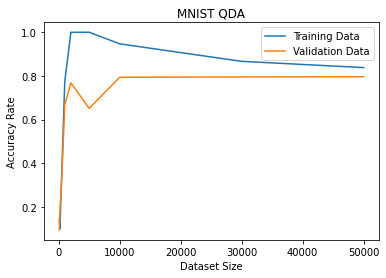

In [20]:
# Section (b)
newMNISTDataset = createValidationSet(mnistData, 10000)

sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
trainingAccuracies = []
validationAccuracies = []
for size in sizes:
    results = MNISTQDA(newMNISTDataset, size)
    trainingAccuracy = accuracy_score(newMNISTDataset["training_labels"][:size], results[0])
    validationAccuracy = accuracy_score(newMNISTDataset["validation_labels"], results[1])
    
    trainingAccuracies.append(trainingAccuracy)
    validationAccuracies.append(validationAccuracy)
    print("Training {} samples of MNIST Data using QDA. Got training accuracy {} and validation accuracy {}."\
          .format(size, trainingAccuracy, validationAccuracy))
    
# Plotting the results
plt.plot(sizes, trainingAccuracies, label="Training Data")
plt.plot(sizes, validationAccuracies, label="Validation Data")
plt.xlabel("Dataset Size")
plt.ylabel("Accuracy Rate")
plt.title("MNIST QDA")
plt.legend()
plt.show()

#### Section (c)
The Linear Discriminant Analysis performed better, as LDA had around an 88% accuracy rate whereas QDA had around an 82% accuracy rate. This could be due to the fact that the LDA's assumption that all classes share the same variance is not far from reality. In addition, QDA could have resulted in more overfitting, as the extra covariance variables introduced makes QDA more susceptible to overfitting. This is also evidenced by the fact that QDA has a higher training accuracy than LDA despite its validation accuracy being lower.

Training 100 samples of MNIST data
Training 200 samples of MNIST data
Training 500 samples of MNIST data
Training 1000 samples of MNIST data
Training 2000 samples of MNIST data
Training 5000 samples of MNIST data
Training 10000 samples of MNIST data
Training 30000 samples of MNIST data
Training 50000 samples of MNIST data


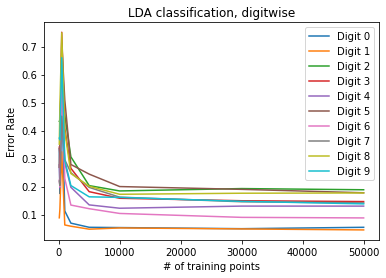

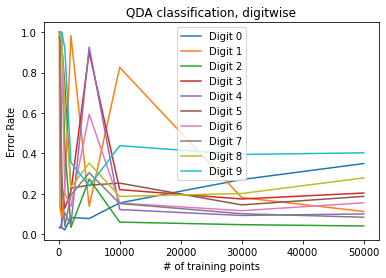

In [21]:
# Section (d)
newMNISTDataset = createValidationSet(mnistData, 10000)

sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
LDAValidationErrors = dict() # Key is digit and value is a list of the validation errors in ascending order of size
QDAValidationErrors = dict() # Same as above
locations = [np.where(newMNISTDataset["validation_labels"] == digit)[0] for digit in range(10)]
for size in sizes:
    print("Training {} samples of MNIST data".format(size))
    LDAResults = MNISTLDA(newMNISTDataset, size)
    QDAResults = MNISTQDA(newMNISTDataset, size)
    
    for digit in range(10):
        if digit not in LDAValidationErrors.keys():
            LDAValidationErrors[digit] = []
            QDAValidationErrors[digit] = []
        
        matchingResults = locations[digit]
        validationLabels = newMNISTDataset["validation_labels"][matchingResults]
        
        LDAValidationErrors[digit].append(1 - accuracy_score(validationLabels, LDAResults[1][matchingResults]))
        QDAValidationErrors[digit].append(1 - accuracy_score(validationLabels, QDAResults[1][matchingResults]))
        
# Plotting the results for LDA
for digit in range(10):
    plt.plot(sizes, LDAValidationErrors[digit], label="Digit {}".format(digit))
plt.xlabel("# of training points")
plt.ylabel("Error Rate")
plt.title("LDA classification, digitwise")
plt.legend()
plt.show()

# Plotting the results for QDA
for digit in range(10):
    plt.plot(sizes, QDAValidationErrors[digit], label="Digit {}".format(digit))
plt.xlabel("# of training points")
plt.ylabel("Error Rate")
plt.title("QDA classification, digitwise")
plt.legend()
plt.show()

For LDA, digit 1 was the easiest to classify. On the other hand, QDA found digit 2 to be the easiest to classify.

### Part 4

In [25]:
# Using LDA since it performed better
trainingData = contrastNormalization(mnistData["training_data"])
trainingLabels = mnistData["training_labels"]
testData = contrastNormalization(mnistData["test_data"])

priors = [] # Arranged in order of digit number(0-9)
means = [] # Arranged in order of digit number(0-9)
cov = np.zeros((trainingData.shape[1], trainingData.shape[1]), dtype=np.float64) # Should be #pixels by #pixels
for digit in range(10): # Using range(10) since are classifying digits from 0-9
    matchingSamples = np.where(trainingLabels == digit)[0]
    prior = len(matchingSamples) / trainingData.shape[0]
    priors.append(prior)

    means.append(np.mean(trainingData[matchingSamples], axis = 0))

    cov += np.cov(trainingData[matchingSamples].T) / 10

gaussians = [scipy.stats.multivariate_normal(means[digit], cov, allow_singular=True) \
            for digit in range(10)]

posteriors = np.array([gaussian.logpdf(testData) for gaussian in gaussians]).T + np.log(priors)
testingPredictions = np.argmax(posteriors, axis = 1)

path = "MNISTPredictions.csv"
results_to_csv(testingPredictions, path)
print("done")

print("Kaggle username: dav18781")
print("Kaggle score: 0.87050")

done
Kaggle username: dav18781
Kaggle score: 0.87050


### Part 5

In [23]:
# Setup
# This performs LDA without any modifications(same method as the one used for MNIST)
def spamLDA(dataset):
    trainingData = contrastNormalization(dataset["training_data"])
    trainingLabels = dataset["training_labels"]
    testData = contrastNormalization(dataset["test_data"])

    priors = [] # Arranged in order of digit number(0-9)
    means = [] # Arranged in order of digit number(0-9)
    cov = np.zeros((trainingData.shape[1], trainingData.shape[1]), dtype=np.float64) # Should be #pixels by #pixels
    for digit in range(2): # Using range(2) since classification is between ham(0) or spam(1)
        matchingSamples = np.where(trainingLabels == digit)[0]
        prior = len(matchingSamples) / trainingData.shape[0]
        priors.append(prior)

        means.append(np.mean(trainingData[matchingSamples], axis = 0))

        cov += np.cov(trainingData[matchingSamples].T) / 2

    gaussians = [scipy.stats.multivariate_normal(means[digit], cov, allow_singular=True) \
                for digit in range(2)]

    posteriors = np.array([gaussian.logpdf(testData) for gaussian in gaussians]).T + np.log(priors)
    testingPredictions = np.argmax(posteriors, axis = 1)
    return testingPredictions

# This performs QDA without any modifications(same method as the one used for MNIST)
def spamQDA(dataset):
    trainingData = contrastNormalization(dataset["training_data"])
    trainingLabels = dataset["training_labels"]
    testData = contrastNormalization(dataset["test_data"])
    
    priors = [] # Arranged in order of digit number(0-9)
    gaussians = [] # Arranged in order of digit number(0-9)
    for digit in range(2): # Using range(2) since classification is between ham(0) or spam(1)
        matchingSamples = np.where(trainingLabels == digit)[0]
        prior = len(matchingSamples) / trainingData.shape[0]
        priors.append(prior)
        
        mean = np.mean(trainingData[matchingSamples], axis = 0)
        
        cov = np.cov(trainingData[matchingSamples].T)
        
        gaussian = scipy.stats.multivariate_normal(mean, cov, allow_singular=True)
        gaussians.append(gaussian)
    
    posteriors = np.array([gaussian.logpdf(testData) for gaussian in gaussians]).T + np.log(priors)
    testingPredictions = np.argmax(posteriors, axis=1)
    return testingPredictions

In [26]:
spamData = io.loadmat("data/spam_data.mat")

#spamPredictions = spamLDA(spamData) # LDA w/o modifications: 0.61618
spamPredictions = spamQDA(spamData) # QDA w/o modifications: 0.78879

path = "SpamPredictions.csv"
results_to_csv(spamPredictions, path)
print("done")

print("Kaggle username: dav18781")
print("Kaggle score: 0.77879")

done
Kaggle username: dav18781
Kaggle score: 0.77879
